In [ ]:
!pip install mpu
import mpu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from lightgbm import LGBMRegressor
import xgboost as xgb
import datetime
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


In [ ]:
ss=pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/sa_sub.csv')
train = pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/train_or.csv' )
test = pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/test_or.csv')

In [ ]:
train['id']=train.index()
test['id']=test.index()

In [ ]:
missing = pd.DataFrame()
missing['sum'] = train.isna().sum()
missing['percentage'] = train.isna().mean() *  100
missing =  missing[missing['sum'] > 0 ].sort_values(ascending = False, by ='sum')
missing

,sum,percentage
Delivery_person_Ratings,1908,4.184853
Delivery_person_Age,1854,4.066414
Time_Orderd,1731,3.796635
City,1200,2.631983
multiple_deliveries,993,2.177966
Weather,616,1.351085
Road_traffic_density,601,1.318185
Festival,228,0.500077


In [ ]:
missing = pd.DataFrame()
missing['sum'] = test.isna().sum()
missing['percentage'] = test.isna().mean() *  100
missing =  missing[missing['sum'] > 0 ].sort_values(ascending = False, by ='sum')
missing

,sum,percentage
Delivery_person_Ratings,507,4.447759
Delivery_person_Age,491,4.307395
Time_Orderd,444,3.895079
City,324,2.842355
multiple_deliveries,238,2.087902
Weather,158,1.386086
Road_traffic_density,154,1.350996
Festival,65,0.570225


In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
ff=['City','Weather','Road_traffic_density','Festival','Type_of_order','Type_of_vehicle']

In [ ]:
train['Vehicle_condition'].unique()

array([1, 0, 3, 2])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather                      44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

#continuation

In [ ]:
ff=['City','Weather','Road_traffic_density','Festival','Type_of_order','Type_of_vehicle']

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/full_data_2.csv')

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month,week,y_week,Date
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,5,9,40,3.1161,0.164005,1,4,1,1,2022-01-04
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,10,19,10,11.0077,0.255993,4,3,6,13,2022-04-03
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,10,23,20,9.0880,0.432762,3,4,4,9,2022-03-04
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,5,21,45,16.6010,0.360891,2,4,4,5,2022-02-04
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,5,17,35,19.9767,0.624272,4,4,0,14,2022-04-04


In [ ]:
train.nunique()

#labelencoding

In [ ]:
rt=df.copy()

In [ ]:
for i in ff:
  le = LabelEncoder()
  le.fit(rt[i])
  rt[i]=le.transform(rt[i])
  

In [ ]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          54647 non-null  float64
 3   Delivery_person_Ratings      54577 non-null  float64
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weather                      56992 non-null  int64  
 12  Road_traffic_density         56992 non-null  int64  
 13  Vehicle_conditio

In [ ]:
rt.head()

In [ ]:
dt=rt.groupby(['Delivery_person_ID'])['Delivery_person_Age','Delivery_person_Ratings'].agg(['mean','median','std','min','max'])

In [ ]:
rt['Delivery_person_Age']=rt['Delivery_person_Age'].fillna(30.10)
rt['Delivery_person_Ratings']=rt['Delivery_person_Ratings'].fillna(4.633581911794346)
rt['multiple_deliveries']=rt['multiple_deliveries'].fillna(1.1)

In [ ]:
rt.Delivery_person_Ratings.mean()

4.633581911794346

In [ ]:
rt.Delivery_person_Ratings.median()

4.7

In [ ]:
dt.head(40)

In [ ]:
rt.info()

In [ ]:
rt['p_time_new']=np.where(rt.Time_Orderd.isna(),9,rt['p_time'])

In [ ]:
rt=pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/new_fea.csv')

In [ ]:
train_new=rt[rt.Time_taken!=999]
test_new=rt[rt.Time_taken==999]

In [ ]:
train_new.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'picked_hour',
       'picked_minute', 'p_time', 'orderd_hour_new', 'orderd_minute_new',
       'distance', 'speed', 'order_day', 'order_month', 'week', 'y_week',
       'Date', 'p_time_new', 'me_time', 'med_time', 's_time', '90_time',
       '25_time', '01_time'],
      dtype='object')

In [ ]:
rt.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,week,y_week,Date,p_time_new,me_time,med_time,s_time,90_time,25_time,01_time
0,0x1c92,COIMBRES03DEL02,39.0,5.000000,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,1,1,2022-01-04,5,21.663934,21.0,6.918189,30.9,16.00,11.00
1,0xaaab,VADRES07DEL01,36.0,4.700000,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,6,13,2022-04-03,10,30.423881,29.0,9.881303,43.0,23.00,13.00
2,0x463,VADRES20DEL03,30.1,4.633582,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,4,9,2022-03-04,9,24.164557,23.0,8.494992,34.2,17.50,10.78
3,0xacec,RANCHIRES07DEL01,37.0,4.200000,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,4,5,2022-02-04,5,31.410714,32.0,9.320119,42.0,25.00,12.20
4,0xb9cc,HYDRES01DEL02,38.0,3.700000,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,0,14,2022-04-04,5,29.812500,28.5,8.855243,40.7,24.75,11.24


In [ ]:
ff=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked','Time_taken','orderd_hour_new', 'orderd_minute_new','p_time','Date','speed','p_time_new']
useful_feature=[c for c in rt.columns if c not in ff]

In [ ]:
useful_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'picked_hour',
 'picked_minute',
 'distance',
 'order_day',
 'order_month',
 'week',
 'y_week',
 'me_time',
 'med_time',
 's_time',
 '90_time',
 '25_time',
 '01_time']

In [ ]:
df_new.to_csv('pre_data_3.csv',index=False)

In [ ]:
train_new[useful_feature].info()

In [ ]:
train_new.head()

In [ ]:
train.head()

#feature_eng-2

In [ ]:
train_new[useful_feature].head()

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,picked_hour,picked_minute,distance,order_day,order_month,week,y_week,p_time_new
0,39.0,5.000000,4,2,1,1,2,1.0,0,0,9,45,3.1161,1,4,1,1,5
1,36.0,4.700000,3,1,0,0,2,3.0,0,0,19,20,11.0077,4,3,6,13,10
2,30.1,4.633582,6,4,3,0,1,1.0,0,0,23,30,9.0880,3,4,4,9,9
3,37.0,4.200000,0,1,1,2,2,2.0,0,1,21,50,16.6010,2,4,4,5,5
4,38.0,3.700000,5,3,2,3,1,1.0,0,0,17,40,19.9767,4,4,0,14,5


In [ ]:
def q90(x):
    return x.quantile(0.9)


def q25(x):
    return x.quantile(0.25)

def q01(x):
    return x.quantile(0.01)

In [ ]:
dt=train_new.groupby(['distance'])['Time_taken'].agg(['mean','median','std',q90,q25,q01])

In [ ]:
dt=dt.reset_index(drop=False)

In [ ]:
dt.columns=['distance','me_time','med_time','s_time','90_time','25_time','01_time']

In [ ]:
dt

,distance,me_time,med_time,s_time,90_time,25_time,01_time
0,1.4651,19.600000,18.5,5.815688,27.1,15.25,13.00
1,1.4652,20.850000,22.0,7.454305,31.1,14.50,10.39
2,1.4653,23.363636,22.0,6.281285,29.0,19.50,15.20
3,1.4686,22.750000,22.0,8.683317,33.5,15.50,11.00
4,1.4687,21.250000,16.0,13.524669,34.4,12.75,12.03
...,...,...,...,...,...,...,...
2254,20.9687,34.750000,34.5,10.039209,46.3,30.00,17.70
2255,20.9688,36.666667,42.0,13.796135,46.0,31.50,21.42
2256,20.9689,26.000000,28.5,5.070926,30.3,20.75,19.07
2257,20.9690,29.800000,29.0,9.033272,39.6,22.50,15.42


In [ ]:
dt['s_time']=dt['s_time'].fillna(0)

In [ ]:
dt.info()

In [ ]:
train_new[train_new.distance==20.9695]

In [ ]:
60/30

2.0

In [ ]:
ww=train_new[train_new.distance==20.9695]
ww[['Time_taken','p_time_new']]

,Time_taken,p_time_new
4442,26.0,15
5452,12.0,5
16983,33.0,5


In [ ]:
df_new= pd.merge(rt, dt, on='distance',how='left')

In [ ]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  float64
 3   Delivery_person_Ratings      56992 non-null  float64
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weather                      56992 non-null  int64  
 12  Road_traffic_density         56992 non-null  int64  
 13  Vehicle_conditio

In [ ]:
dt

,distance,me_time,med_time,s_time,90_time,25_time,01_time
0,1.4651,19.600000,18.5,5.815688,27.1,15.25,13.00
1,1.4652,20.850000,22.0,7.454305,31.1,14.50,10.39
2,1.4653,23.363636,22.0,6.281285,29.0,19.50,15.20
3,1.4686,22.750000,22.0,8.683317,33.5,15.50,11.00
4,1.4687,21.250000,16.0,13.524669,34.4,12.75,12.03
...,...,...,...,...,...,...,...
2254,20.9687,34.750000,34.5,10.039209,46.3,30.00,17.70
2255,20.9688,36.666667,42.0,13.796135,46.0,31.50,21.42
2256,20.9689,26.000000,28.5,5.070926,30.3,20.75,19.07
2257,20.9690,29.800000,29.0,9.033272,39.6,22.50,15.42


In [ ]:
dt.loc[len(dt.index)] = [4.3958, 22.9, 21.9,2,26,18.5,13] 

In [ ]:
dt[(dt['distance']>4)&(dt['distance']<4.5)]

,distance,me_time,med_time,s_time,90_time,25_time,01_time
219,4.3950,21.500000,21.5,5.686241,26.8,18.00,15.12
220,4.3952,20.333333,19.0,4.226898,25.5,17.25,16.05
221,4.3953,20.500000,19.0,6.071008,28.6,18.00,12.21
222,4.3954,25.692308,28.0,7.785983,33.5,20.50,10.25
223,4.3955,18.500000,20.5,6.534524,24.5,13.25,10.05
224,4.3956,19.571429,19.0,5.912054,26.0,16.50,10.30
225,4.4055,20.750000,22.0,6.344289,25.8,18.75,12.27
226,4.4056,26.000000,26.0,0.000000,26.0,26.00,26.00
227,4.4057,20.600000,21.5,6.636599,28.0,14.00,13.00
228,4.4060,15.000000,15.0,0.000000,15.0,15.00,15.00


In [ ]:
ey[['distance']]

,distance
51047,4.3958
51483,4.3958
54926,4.3958
55937,4.3958


In [ ]:
ey=df_new[df_new['01_time'].isna()]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 56991
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  float64
 3   Delivery_person_Ratings      56992 non-null  float64
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weather                      56992 non-null  int64  
 12  Road_traffic_density         56992 non-null  int64  
 13  Vehicle_conditio

In [ ]:
ff=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked','Time_taken','orderd_hour_new', 'orderd_minute_new','p_time','Date','speed','01_time','me_time',
 'med_time',
 's_time',
 '90_time',
 '25_time','p_time_new','picked_minute']
useful_feature=[c for c in df_new.columns if c not in ff]

In [ ]:
useful_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'picked_hour',
 'distance',
 'order_day',
 'order_month',
 'week',
 'y_week']

In [ ]:
train_new=df_new[df_new.Time_taken!=999]
test_new=df_new[df_new.Time_taken==999]

In [ ]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11399 entries, 45593 to 56991
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  float64
 3   Delivery_person_Ratings      11399 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11399 non-null  int64  
 12  Road_traffic_density         11399 non-null  int64  
 13  Vehicle_cond

#model

In [ ]:
train_new['kfold'] = -1

In [ ]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
for fold ,(train_indicies,valid_indicies) in enumerate(kf.split(X=train_new)):
  train_new.loc[valid_indicies,'kfold']=fold

In [ ]:
from lightgbm import LGBMRegressor
sub_new=pd.DataFrame()

In [ ]:
df=train_new.copy()
scores=[]
test_r=test_new[useful_feature]
final_test_pr=[]
final_valid_pr={}

for fold in range(5):
  xtrain=df[df.kfold!=fold].reset_index(drop=True)
  xvalid=df[df.kfold==fold].reset_index(drop=True)
  #
  valid_ids=xvalid.ID.values.tolist()

  ytrain=xtrain['Time_taken']
  yvalid=xvalid['Time_taken']

  xtrain=xtrain[useful_feature]
  xvalid=xvalid[useful_feature]
 
  

  lgbm = LGBMRegressor(random_state=41)

  model=lgbm.fit(xtrain, ytrain ,eval_set=[(xvalid, yvalid)], verbose=20, early_stopping_rounds=200)
  
  valid_pred = model.predict(xvalid)  #predicting for the valid set add some time to the process

  rmse=np.sqrt(mean_squared_error(yvalid,valid_pred))
  print(fold,rmse)
  #print(fold)
  #print("RMSLE LGBM: ", sqrt((mean_squared_error((yvalid),(valid_pred)))))

  test_p=model.predict(test_r)  #predicting test set
  final_test_pr.append(test_p)

  #final_valid_pr.update(dict(zip(valid_ids,valid_pred)))

  scores.append(rmse)

print(np.mean(scores),np.std(scores))

#final_valid_pred=pd.DataFrame.from_dict(final_valid_pr ,orient="index").reset_index()
#final_valid_pred.columns=['id','pred_3']
#final_valid_pred.to_csv('valid_pr_3.csv',index=False)

sub_new['pred_3']=np.mean(np.column_stack(final_test_pr),axis=1)

Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 20.5851
[40]	valid_0's l2: 16.6699
[60]	valid_0's l2: 16.1233
[80]	valid_0's l2: 15.9643
[100]	valid_0's l2: 15.9173
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 15.9173
0 3.9896553596728244
Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 20.0808
[40]	valid_0's l2: 15.955
[60]	valid_0's l2: 15.2702
[80]	valid_0's l2: 15.1389
[100]	valid_0's l2: 15.0937
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 15.0937
1 3.885059828416006
Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 19.6866
[40]	valid_0's l2: 15.5824
[60]	valid_0's l2: 15.0416
[80]	valid_0's l2: 14.8805
[100]	valid_0's l2: 14.8456
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 14.8422
2 3.8525554580097827
Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 20.2335
[40]	valid_0's l2: 16.186

In [ ]:
sub_new

,pred_3
0,27.892474
1,19.108123
2,28.599002
3,15.730120
4,33.875021
...,...
11394,14.991885
11395,24.045917
11396,22.439921
11397,36.680137


In [ ]:
sub['Time_taken (min)']=sub_new['pred_3']

In [ ]:
sub

,ID,Time_taken (min)
0,0xb7dc,27.892474
1,0x1adc,19.108123
2,0xca5f,28.599002
3,0x2fd7,15.730120
4,0x52d1,33.875021
...,...,...
11394,0x6433,14.991885
11395,0xa145,24.045917
11396,0x4a0a,22.439921
11397,0xb845,36.680137


In [ ]:
sub.to_csv('stac_ama.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split
# Let's split the train data into training and validation sets.

X_train, X_validation, y_train, y_validation = train_test_split(train_new[useful_feature], train_new['Time_taken'], train_size=0.8, random_state=42)

In [ ]:
useful_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'picked_hour',
 'picked_minute',
 'distance',
 'order_day',
 'order_month',
 'week',
 'y_week',
 'me_time',
 'med_time',
 's_time',
 '90_time',
 '25_time',
 '01_time']

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model=lgbm.fit(train_new[useful_feature], train_new['Time_taken'])

In [ ]:
lgbm

LGBMRegressor(bagging_fraction=0.9629142277080549, bagging_freq=2,
              feature_fraction=0.9960561778838766, feature_fraction_seed=9,
              lambda_l1=1.4015882136489533, lambda_l2=0.5850759235595564,
              learning_rate=0.03262376391040526, max_bin=810, max_depth=20,
              min_child_samples=110, min_data_in_leaf=15, n_estimators=500,
              num_leaves=156, random_state=42)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
model=lgbm.fit(X_train, y_train ,eval_set=[(X_validation, y_validation)], verbose=20, early_stopping_rounds=20)
  #model=lgbm.fit(xtrain, ytrain)

valid_pred = model.predict(X_validation)

rmse=np.sqrt(mean_squared_error(y_validation,valid_pred))
print(rmse)

Training until validation scores don't improve for 20 rounds.
[20]	valid_0's l2: 20.7803
[40]	valid_0's l2: 16.3298
[60]	valid_0's l2: 15.7573
[80]	valid_0's l2: 15.5693
[100]	valid_0's l2: 15.5265
Did not meet early stopping. Best iteration is:
[89]	valid_0's l2: 15.5088
3.938117523406352


In [ ]:
from sklearn import metrics

In [ ]:
print(100*metrics.r2_score(y_validation,valid_pred))
from sklearn import metrics

82.56666591213175


In [ ]:
ppar={'n_estimators': 1382,
 'learning_rate': 0.049226244614842464,
 'max_depth': 12,
 'feature_fraction_seed': 14,
 'max_bin': 658,
 'min_data_in_leaf': 32,
 'lambda_l1': 0.0036765211793337196,
 'lambda_l2': 5.084139592060012,
 'num_leaves': 127,
 'feature_fraction': 0.8121750317968954,
 'bagging_fraction': 0.9238642303425548,
 'bagging_freq': 1,
 'min_child_samples': 26,
 'random_state': 42}

In [ ]:
new={'n_estimators': 500,
 'learning_rate': 0.03262376391040526,
 'max_depth': 20,
 'feature_fraction_seed': 9,
 'max_bin': 810,
 'min_data_in_leaf': 15,
 'lambda_l1': 1.4015882136489533,
 'lambda_l2': 0.5850759235595564,
 'num_leaves': 156,
 'feature_fraction': 0.9960561778838766,
 'bagging_fraction': 0.9629142277080549,
 'bagging_freq': 2,
 'min_child_samples': 110,
 'random_state': 42}

In [ ]:
last={'n_estimators': 300,
 'learning_rate': 0.018700117611192398,
 'max_depth': 11,
 'feature_fraction_seed': 12,
 'max_bin': 1259,
 'min_data_in_leaf': 13,
 'lambda_l1': 0.000501779017090744,
 'lambda_l2': 0.0028465830882565923,
 'num_leaves': 108,
 'feature_fraction': 0.9988626933249046,
 'bagging_fraction': 0.9876894826253801,
 'bagging_freq': 4,
 'min_child_samples': 130,
 'random_state': 42}

In [ ]:
lgbm = LGBMRegressor(**last)
model=lgbm.fit(X_train, y_train ,eval_set=[(X_validation, y_validation)], verbose=20, early_stopping_rounds=200)
  #model=lgbm.fit(xtrain, ytrain)

valid_pred = model.predict(X_validation)

rmse=np.sqrt(mean_squared_error(y_validation,valid_pred))
print(rmse)

Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 50.8694
[40]	valid_0's l2: 33.1243
[60]	valid_0's l2: 24.3694
[80]	valid_0's l2: 19.9802
[100]	valid_0's l2: 17.7981
[120]	valid_0's l2: 16.6826
[140]	valid_0's l2: 16.0641
[160]	valid_0's l2: 15.7015
[180]	valid_0's l2: 15.4691
[200]	valid_0's l2: 15.3257
[220]	valid_0's l2: 15.2395
[240]	valid_0's l2: 15.1837
[260]	valid_0's l2: 15.1565
[280]	valid_0's l2: 15.1443
[300]	valid_0's l2: 15.1441
Did not meet early stopping. Best iteration is:
[291]	valid_0's l2: 15.1404
3.891070730470176


In [ ]:
lgbm = LGBMRegressor(**ppar)
model=lgbm.fit(X_train, y_train ,eval_set=[(X_validation, y_validation)], verbose=20, early_stopping_rounds=200)
  #model=lgbm.fit(xtrain, ytrain)

valid_pred = model.predict(X_validation)

rmse=np.sqrt(mean_squared_error(y_validation,valid_pred))
print(rmse)

Training until validation scores don't improve for 200 rounds.
[20]	valid_0's l2: 28.9352
[40]	valid_0's l2: 18.2893
[60]	valid_0's l2: 16.0451
[80]	valid_0's l2: 15.4905
[100]	valid_0's l2: 15.3069
[120]	valid_0's l2: 15.2585
[140]	valid_0's l2: 15.2106
[160]	valid_0's l2: 15.1916
[180]	valid_0's l2: 15.1942
[200]	valid_0's l2: 15.1918
[220]	valid_0's l2: 15.183
[240]	valid_0's l2: 15.1949
[260]	valid_0's l2: 15.2103
[280]	valid_0's l2: 15.2429
[300]	valid_0's l2: 15.247
[320]	valid_0's l2: 15.2689
[340]	valid_0's l2: 15.2679
[360]	valid_0's l2: 15.2726
[380]	valid_0's l2: 15.2941
[400]	valid_0's l2: 15.299
[420]	valid_0's l2: 15.3147
Early stopping, best iteration is:
[221]	valid_0's l2: 15.1825
3.896469042842412


In [ ]:
print(100*metrics.r2_score(y_validation,valid_pred))

82.81910110972137


In [ ]:
ss

In [ ]:
test_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month,week,y_week,Date
0,0xb7dc,BANGRES08DEL03,31.0,4.2,12.906229,77.596791,12.936229,77.626791,26-03-2022,23:20,...,5,23,20,4.6583,0.004663,26,3,5,12,2022-03-26
1,0x1adc,VADRES02DEL02,20.0,4.7,0.000000,0.000000,0.080000,0.080000,16-03-2022,18:55,...,10,18,55,12.5803,0.012593,16,3,2,11,2022-03-16
2,0xca5f,KOCRES11DEL02,39.0,4.9,10.006881,76.345397,10.056881,76.395397,17-02-2022,18:30,...,15,18,30,7.8028,0.007811,17,2,3,7,2022-02-17
3,0x2fd7,VADRES08DEL03,28.0,4.9,0.000000,0.000000,0.060000,0.060000,01-03-2022,23:45,...,15,23,45,9.4352,0.009445,1,3,0,1,2022-01-03
4,0x52d1,MYSRES14DEL03,24.0,4.0,0.000000,0.000000,0.090000,0.090000,04-04-2022,21:20,...,10,21,20,14.1528,0.014167,4,4,0,14,2022-04-04


ID                                       0x2318
Delivery_person_ID              COIMBRES13DEL01
Delivery_person_Age                         NaN
Delivery_person_Ratings                     NaN
Restaurant_latitude                   11.003669
Restaurant_longitude                  76.976494
Delivery_location_latitude            11.043669
Delivery_location_longitude           77.016494
Order_Date                           30-03-2022
Time_Orderd                                 NaN
Time_Order_picked                         15:05
Weather conditions                          NaN
Road_traffic_density                        NaN
Vehicle_condition                             3
Type_of_order                            Drinks
Type_of_vehicle                electric_scooter
multiple_deliveries                    1.000000
Festival                                     No
City                              Metropolitian

In [ ]:
test_new[test_new.ID=='0x2318']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month,week,y_week,Date
3907,0x2318,COIMBRES13DEL01,30.1,4.633582,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,10,14,55,6.2324,0.006239,30,3,2,13,2022-03-30


In [ ]:
ee=train_new[train_new.distance==6.2324]
ee['Time_taken']

1005     22.0
1481     27.0
1532     11.0
1641     33.0
1816     26.0
         ... 
41504    19.0
42395    19.0
43245    29.0
43914    29.0
44299    29.0
Name: Time_taken, Length: 87, dtype: float64

In [ ]:
ee['Time_taken'].describe()

count    87.000000
mean     24.643678
std       8.267303
min      10.000000
25%      18.500000
50%      26.000000
75%      30.000000
max      43.000000
Name: Time_taken, dtype: float64

In [ ]:
sub[sub.ID=='0x2318']

,ID,Time_taken (min)
3907,0x2318,48.888592


In [ ]:
ind

,ID,index
0,0x2318,45593
1,0x3474,45594
2,0x9420,45595
3,0x72ee,45596
4,0xa759,45597
...,...,...
11394,0x6909,56987
11395,0x443b,56988
11396,0x1ea5,56989
11397,0x22d4,56990


In [ ]:
ind[ind.ID=='0xb7dc']

,ID,index
1030,0xb7dc,46623


In [ ]:
from sklearn import metrics

In [ ]:
useful_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'picked_hour',
 'distance',
 'order_day',
 'order_month',
 'week',
 'y_week']

In [ ]:
pp=model.predict(test_new[useful_feature])

In [ ]:
sub=pd.DataFrame()

In [ ]:
sub

""


In [ ]:
sub['ID']=test_new['ID']
sub['Time_taken (min)']=pp

In [ ]:
sub

,ID,Time_taken (min)
45593,0xb7dc,28.124379
45594,0x1adc,19.577996
45595,0xca5f,29.361280
45596,0x2fd7,16.151081
45597,0x52d1,33.051227
...,...,...
56987,0x6433,14.774671
56988,0xa145,23.718845
56989,0x4a0a,23.285624
56990,0xb845,36.845181


In [ ]:
sub=sub.reset_index(drop=True)

In [ ]:
sub=sub[['ID','Time_taken (min)']]

In [ ]:
%cd "/content"

/content


In [ ]:
sub.to_csv('tuned_hiring_coorect.csv',index=False)

In [ ]:
sub['Time_taken (min)'].describe()

count    11399.000000
mean        26.207092
std          8.543207
min         10.000000
25%         19.853219
50%         24.559495
75%         32.142835
max         53.137382
Name: Time_taken (min), dtype: float64

In [ ]:
sub['Time_taken (min)']=np.where(sub['Time_taken (min)']<10,10,sub['Time_taken (min)'])

In [ ]:
sub.to_csv('new_we_.csv',index=False)

In [ ]:
sub.to_csv('adj_iop.csv',index=False)

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
sub[sub['Time_taken (min)']<10]

,ID,Time_taken (min)


In [ ]:
sub['ID']=26.0

In [ ]:
erty=test_new[test_new.ID=='0x8d8f']
erty['distance']

55805    4.7176
Name: distance, dtype: float64

In [ ]:
dt[dt.distance==4.7176]

,distance,me_time,med_time,s_time,90_time,25_time,01_time
376,4.7176,22.977636,22.0,7.756892,32.8,17.0,10.0


In [ ]:
sub['Time_taken (min)']=np.where(sub['Time_taken (min)']<10,10,sub['Time_taken (min)'])

In [ ]:
useful_feature.append('Time_taken')

In [ ]:
we=train_new[(train_new.distance==4.7176)&(train_new.Time_taken<12)]
we[useful_feature]

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,picked_hour,picked_minute,distance,order_day,order_month,week,y_week,p_time_new,Time_taken
2353,25.0,4.6,5,1,2,3,1,0.0,2,2,20,15,4.7176,5,3,1,18,15,11.0
2413,25.0,5.0,4,1,1,1,3,0.0,0,0,20,15,4.7176,17,3,3,11,5,10.0
11964,23.0,4.7,1,2,2,2,1,1.0,0,0,22,50,4.7176,17,2,3,7,5,11.0
14680,29.0,4.6,1,3,2,2,2,0.0,0,2,17,35,4.7176,13,2,6,6,15,11.0
15440,26.0,4.8,3,1,1,2,3,0.0,0,0,19,50,4.7176,1,3,0,1,10,11.0
17729,28.0,4.8,0,2,1,0,3,0.0,0,3,23,35,4.7176,30,3,2,13,10,10.0
18459,21.0,4.6,4,1,1,3,2,1.0,0,0,21,15,4.7176,30,3,2,13,5,11.0
20868,20.0,4.7,1,3,2,3,3,1.0,0,0,17,25,4.7176,3,3,3,9,15,11.0
34480,22.0,4.7,2,1,1,2,2,0.0,0,2,20,35,4.7176,21,3,0,12,15,10.0
35716,21.0,4.7,4,3,1,3,3,0.0,0,2,17,50,4.7176,11,3,3,44,15,11.0


In [ ]:
sub.to_csv('check.csv',index=False)

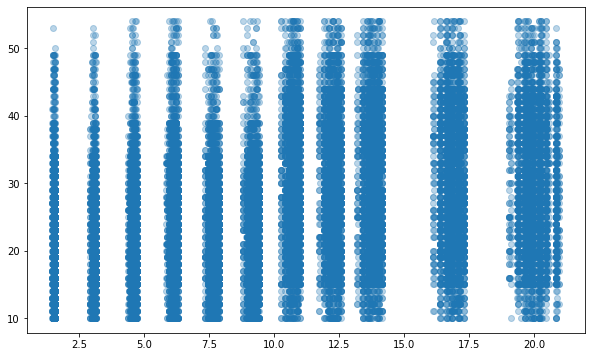

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=train['Time_taken'],x=train['distance_new'],alpha=0.3)

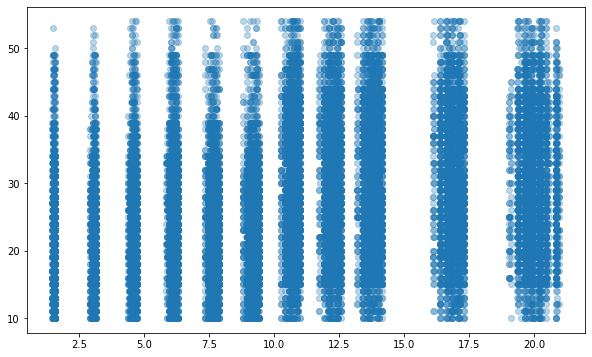

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=train_new['Time_taken'],x=train_new['distance'],alpha=0.3)

In [ ]:
onw=train[(train_new['Time_taken']>40)&(train_new.distance<2)]

In [ ]:
train_new.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'picked_hour',
       'picked_minute', 'p_time', 'orderd_hour_new', 'orderd_minute_new',
       'distance', 'speed', 'order_day', 'order_month', 'week', 'y_week',
       'Date', 'p_time_new', 'me_time', 'med_time', 's_time', '90_time',
       '25_time', '01_time'],
      dtype='object')

In [ ]:
h=train[(train_new['p_time_new']==15)&(train_new.Time_taken<15)]
b=train_new[(train_new['p_time_new']==15)&(train_new.Time_taken<15)]
m=b['distance']

In [ ]:
m

15       12.4355
77        6.2901
96       12.0994
98        4.5282
128       6.1209
          ...   
45437    16.9033
45482    20.2538
45529     7.4502
45563     1.5148
45575    13.8301
Name: distance, Length: 1243, dtype: float64

In [ ]:
from math import sin, cos, sqrt, atan2 ,radians

R = 6373.0

def distance_cal(lat1,lon1,lat2,lon2):

  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
  c = 2 * atan2(sqrt(a), sqrt(1-a))
  distance = R * c
  return distance

In [ ]:
train['distance_new'] = train.apply(lambda row : distance_cal(row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude'],row['Restaurant_latitude'],row['Restaurant_longitude']), axis = 1)

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance_new
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0,3.117105
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0,11.011190
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,9.090833
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0,16.606166
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0,19.983018


In [ ]:
train['Restaurant_latitude']=abs(train['Restaurant_latitude'])
train['Restaurant_longitude']=abs(train['Restaurant_longitude'])

In [ ]:
train[train.distance_new>25]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance_new
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,16570.887023
21,0x50b,MUMRES03DEL01,NaN,NaN,-19.223840,-72.841347,19.263840,72.881347,05-03-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,0.0,No,NaN,34.0,16427.762795
105,0x4f6,COIMBRES14DEL01,NaN,NaN,-11.003681,-76.975525,11.073681,77.045525,02-04-2022,NaN,...,NaN,NaN,3,Meal,bicycle,0.0,No,NaN,20.0,17186.097414
408,0x420,SURRES13DEL01,50.0,6.0,-21.170096,-72.789122,21.180096,72.799122,15-03-2022,NaN,...,NaN,NaN,3,Meal,motorcycle,0.0,No,Metropolitian,17.0,16459.414385
472,0xc0c6,LUDHRES12DEL01,28.0,4.8,-30.893244,75.821817,30.933244,75.861817,17-02-2022,15:35,...,Sandstorms,Medium,2,Snack,electric_scooter,1.0,No,NaN,21.0,6876.951246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45515,0x5a9,VADRES05DEL03,NaN,NaN,-22.310526,73.170937,22.400526,73.260937,04-03-2022,NaN,...,Fog,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,48.0,4973.212416
45531,0xc06e,BHPRES15DEL02,36.0,5.0,-23.234249,77.434007,23.254249,77.454007,13-02-2022,9:30,...,Sunny,Low,2,Meal,scooter,1.0,No,Metropolitian,10.0,5170.908332
45533,0x576,HYDRES11DEL02,NaN,NaN,-17.430448,78.418213,17.560448,78.548213,06-04-2022,NaN,...,Fog,Low,2,Meal,scooter,1.0,No,Metropolitian,37.0,3892.057547
45565,0x473,MYSRES07DEL03,NaN,NaN,-12.325461,-76.632278,12.385461,76.692278,03-03-2022,NaN,...,NaN,NaN,3,Buffet,scooter,NaN,No,Metropolitian,16.0,17124.202351


In [ ]:
h

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
15,0x8738,MYSRES01DEL02,21.0,4.9,12.311072,76.654878,12.391072,76.734878,18-03-2022,23:50,24:05,Sandstorms,Low,1,Snack,scooter,0.0,No,NaN,12.0
77,0x92e3,RANCHIRES03DEL01,21.0,4.6,0.000000,0.000000,0.040000,0.040000,01-03-2022,16:20,16:35,Sandstorms,Medium,0,Buffet,motorcycle,1.0,No,Urban,14.0
96,0x9f24,INDORES16DEL02,24.0,4.7,22.744648,75.894377,22.824648,75.974377,27-03-2022,18:50,19:05,Sunny,Medium,1,Snack,motorcycle,0.0,No,Urban,12.0
98,0xb42d,RANCHIRES05DEL03,30.0,4.9,23.355164,85.324097,23.385164,85.354097,19-03-2022,22:45,22:60,Sunny,Low,1,Snack,scooter,1.0,No,Urban,11.0
128,0xaf1c,MUMRES09DEL01,27.0,4.6,18.994049,72.825203,19.034049,72.865203,26-03-2022,13:40,13:55,Sandstorms,High,1,Buffet,scooter,1.0,No,Metropolitian,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45437,0x4a4a,HYDRES03DEL01,26.0,4.9,17.422819,78.449578,17.532819,78.559578,20-03-2022,23:40,23:55,Stormy,Low,1,Meal,motorcycle,0.0,No,Urban,13.0
45482,0x123c,COIMBRES12DEL02,26.0,4.5,11.000762,76.981876,11.130762,77.111876,25-03-2022,23:30,23:45,Stormy,Low,2,Drinks,scooter,0.0,No,Metropolitian,14.0
45529,0x71ed,JAPRES16DEL02,38.0,4.8,26.849596,75.800512,26.899596,75.850512,30-03-2022,22:10,22:25,Sunny,Low,2,Meal,motorcycle,0.0,No,Metropolitian,13.0
45563,0x6477,VADRES20DEL01,32.0,4.7,22.311358,73.164798,22.321358,73.174798,24-03-2022,8:60,9:15,Sunny,Low,1,Buffet,scooter,1.0,No,Urban,13.0


In [ ]:
dt

In [ ]:
onw

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
155,0x7fec,INDORES20DEL01,28.0,3.9,22.732225,75.874765,22.742225,75.884765,03-04-2022,11:55,12:05,Sunny,High,0,Meal,motorcycle,1.0,No,Urban,45.0
423,0x158c,HYDRES09DEL01,34.0,4.7,17.431668,78.408321,17.441668,78.418321,26-03-2022,11:55,12:10,Stormy,High,0,Meal,motorcycle,3.0,No,Metropolitian,44.0
799,0xa447,INDORES12DEL01,24.0,4.3,22.748060,75.893400,22.758060,75.903400,30-03-2022,11:60,12:05,Sunny,High,0,Buffet,motorcycle,0.0,Yes,Urban,42.0
1638,0xc7fb,KOCRES13DEL01,NaN,NaN,9.991703,76.293136,10.001703,76.303136,11-02-2022,NaN,12:05,Windy,High,0,Drinks,motorcycle,2.0,No,Metropolitian,49.0
2791,0x2570,CHENRES06DEL01,20.0,3.6,13.054347,80.257221,13.064347,80.267221,03-03-2022,11:55,12:10,Sunny,High,0,Snack,motorcycle,1.0,No,Metropolitian,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42001,0xcb2a,AGRRES02DEL01,35.0,4.3,0.000000,0.000000,0.010000,0.010000,11-02-2022,11:25,11:40,Sandstorms,High,0,Drinks,motorcycle,1.0,No,Metropolitian,43.0
42518,0x435,COIMBRES15DEL01,NaN,NaN,-11.006686,-76.951736,11.016686,76.961736,17-03-2022,NaN,11:50,NaN,NaN,3,Snack,motorcycle,1.0,No,Metropolitian,45.0
43471,0x43c2,RANCHIRES16DEL01,38.0,4.8,23.371292,85.327872,23.381292,85.337872,26-03-2022,11:35,11:40,Sandstorms,High,0,Snack,motorcycle,3.0,No,Semi-Urban,49.0
44894,0x2673,BANGRES14DEL01,37.0,4.7,12.949934,77.699386,12.959934,77.709386,01-03-2022,11:15,11:25,Stormy,High,0,Meal,motorcycle,2.0,No,Urban,49.0


In [ ]:
train[(train_new['distance']>15)&(train_new.Time_taken<12)]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
877,0xbc18,JAPRES06DEL03,26.0,4.6,26.911927,75.797282,27.051927,75.937282,31-03-2022,22:30,22:45,Stormy,Low,1,Buffet,motorcycle,0.0,NaN,Metropolitian,10.0
1193,0x9302,CHENRES15DEL02,29.0,4.8,13.026286,80.275235,13.156286,80.405235,04-04-2022,23:30,23:35,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,10.0
1197,0x3816,SURRES09DEL02,25.0,4.9,21.175975,72.795503,21.305975,72.925503,12-03-2022,22:35,22:50,Stormy,Low,2,Meal,motorcycle,1.0,NaN,Metropolitian,10.0
1769,0x5632,COIMBRES02DEL02,24.0,5.0,11.022477,76.995667,11.152477,77.125667,10-03-2022,21:20,21:25,Sunny,Jam,1,Snack,scooter,0.0,No,Urban,10.0
2058,0x6760,PUNERES06DEL02,29.0,4.6,18.546258,73.904337,18.676258,74.034337,12-03-2022,22:10,22:15,Stormy,Low,1,Snack,motorcycle,0.0,No,Urban,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43368,0x56c6,MUMRES18DEL02,28.0,5.0,19.109300,72.825451,19.239300,72.955451,04-04-2022,18:20,18:25,Sunny,Medium,2,Drinks,scooter,0.0,No,Metropolitian,11.0
43959,0x90c1,MYSRES18DEL01,20.0,5.0,12.337928,76.617889,12.447928,76.727889,31-03-2022,17:15,17:25,Sunny,Medium,1,Buffet,motorcycle,0.0,No,Metropolitian,11.0
44138,0x704c,BANGRES18DEL02,29.0,4.9,12.913041,77.683237,13.043041,77.813237,06-03-2022,22:55,22:60,Windy,Low,2,Drinks,electric_scooter,0.0,No,Urban,10.0
44210,0x8cd2,VADRES16DEL01,24.0,4.6,0.000000,0.000000,0.110000,0.110000,04-04-2022,23:25,23:30,Windy,Low,1,Meal,scooter,0.0,No,Urban,10.0


In [ ]:
erty['p_time_new']

56371    15
Name: p_time_new, dtype: int64

In [ ]:
train_new['Time_taken'].describe()

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken, dtype: float64

In [ ]:
ll['Time_taken (min)']=pp

In [ ]:
ll_new

,ID,Time_taken (min)
0x2318,0x2318,47.083182
0x3474,0x3474,57.394473
0x9420,0x9420,55.736088
0x72ee,0x72ee,53.322671
0xa759,0xa759,53.380257
...,...,...
0x6909,0x6909,53.736858
0x443b,0x443b,36.379632
0x1ea5,0x1ea5,48.636519
0x22d4,0x22d4,53.619541


In [ ]:
ll

,ID,Time_taken (min)
0,0x2318,42.557981
1,0x3474,51.992127
2,0x9420,48.053540
3,0x72ee,45.452908
4,0xa759,54.541081
...,...,...
11394,0x6909,45.146074
11395,0x443b,54.504231
11396,0x1ea5,52.984281
11397,0x22d4,55.352177


In [ ]:
ll.to_csv('lastel.csv',index=False)

In [ ]:
train.Time_taken.describe()

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken, dtype: float64

In [ ]:
sub.shape

(11399, 2)

In [ ]:
ll.describe()

,Time_taken (min)
count,11399.000000
mean,48.272364
std,6.999477
min,30.855917
25%,45.039911
50%,50.855924
75%,53.366551
max,60.752459


In [ ]:
sub.to_csv('one.csv',index=False)

In [ ]:
sub.head()

,ID,Time_taken (min)
0,0xb7dc,42.557981
1,0x1adc,51.992127
2,0xca5f,48.053540
3,0x2fd7,45.452908
4,0x52d1,54.541081


In [ ]:
ind=pd.read_csv('/content/idexed_csv.csv')
ind.head()

,ID,index
0,0x2318,45593
1,0x3474,45594
2,0x9420,45595
3,0x72ee,45596
4,0xa759,45597


In [ ]:
ss.head()

,ID,Time_taken (min)
0,0x7faf,25.0
1,0x4607,24.0
2,0xb379,33.0
3,0x7804,19.0
4,0x20f7,42.0


In [ ]:
ll[ll.ID=='0x3474']

,ID,Time_taken (min)
1,0x3474,57.394473


In [ ]:
ll_new=ll.set_index(ll['ID'].values,drop=False)

In [ ]:
ss

,ID,Time_taken (min)
0,0x7faf,25.0
1,0x4607,24.0
2,0xb379,33.0
3,0x7804,19.0
4,0x20f7,42.0


In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5 non-null      object 
 1   Time_taken (min)  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11399 non-null  object 
 1   Time_taken (min)  11399 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [ ]:
ll_new[ll_new.ID=='0xca6d']

,ID,Time_taken (min)
0xca6d,0xca6d,54.770049


In [ ]:
ll['ID']=0
ll['Time_taken (min)']=0

In [ ]:
ll

,ID,Time_taken (min)
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11394,0,0
11395,0,0
11396,0,0
11397,0,0


In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance_new
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0,3.116127
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0,11.007735
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,16565.686682
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0,16.600954
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0,19.976746


In [ ]:
import geopy.distance

In [ ]:
train['distance_new_1'] = train.apply(lambda row : geopy.distance.geodesic((row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude']),(row['Restaurant_latitude'],row['Restaurant_longitude'])), axis = 1)

In [ ]:
train.head()

In [ ]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.geodesic(coords_1, coords_2).km

SyntaxError: ignored

In [ ]:
0xca6d

In [ ]:
ll.to_csv('bbbb.csv',index=False)

In [ ]:
rt=ll.set_index('ID')

In [ ]:
ll

In [ ]:
rt.to_csv('one_c.csv',index=False)

In [ ]:
ll.set_index('ID')
ll.to_csv('iyu.csv',index=False)

In [ ]:
ui=pd.read_csv('/content/one_c.csv')

In [ ]:
ui

,Time_taken (min)
0,47.083182
1,57.394473
2,55.736088
3,53.322671
4,53.380257
...,...
11394,53.736858
11395,36.379632
11396,48.636519
11397,53.619541


In [ ]:
ll

In [ ]:
ll_new

,ID,Time_taken (min)
0x2318,0x2318,47.083182
0x3474,0x3474,57.394473
0x9420,0x9420,55.736088
0x72ee,0x72ee,53.322671
0xa759,0xa759,53.380257
...,...,...
0x6909,0x6909,53.736858
0x443b,0x443b,36.379632
0x1ea5,0x1ea5,48.636519
0x22d4,0x22d4,53.619541


In [ ]:
ll_new.to_csv('yuio_new.csv',index=False)

In [ ]:
io=pd.read_csv('/content/yuio.csv')

In [ ]:
io.shape

(11399, 3)

In [ ]:
io

In [ ]:
ll

,ID,Time_taken (min)
0,0x2318,47.083182
1,0x3474,57.394473
2,0x9420,55.736088
3,0x72ee,53.322671
4,0xa759,53.380257
...,...,...
11394,0x6909,53.736858
11395,0x443b,36.379632
11396,0x1ea5,48.636519
11397,0x22d4,53.619541


In [ ]:
ss.columns

Index(['ID', 'Time_taken (min)'], dtype='object')

In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5 non-null      object 
 1   Time_taken (min)  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
ll.shape

(11399, 2)

In [ ]:
ll.info()

In [ ]:
ll.columns

Index(['ID', 'Time_taken (min)'], dtype='object')

In [ ]:
ll.to_csv('new_inx.csv',index=False)

In [ ]:
le = LabelEncoder()
le.fit(ind['ID'])
sub['mask']=le.transform(sub['ID'])

In [ ]:
sub_new_t=sub_new.sort_values('index')

In [ ]:
sub_new_t[sub_new_t.ID=='0xca6d']

,ID,Time_taken (min),mask,index
1407,0xca6d,54.770049,9965,47000


In [ ]:
sub_new_t=sub_new_t.reset_index(drop=True)
ll=sub_new_t[['ID','Time_taken (min)']]

In [ ]:
sub_new=pd.merge(sub,ind,on=['ID'])

In [ ]:
sub_new

,ID,Time_taken (min),mask,index
0,0xb7dc,42.557981,8961,46623
1,0x1adc,51.992127,568,51760
2,0xca5f,48.053540,9962,54692
3,0x2fd7,45.452908,1650,49416
4,0x52d1,54.541081,3473,56675
...,...,...,...,...
11394,0x6433,45.146074,4408,56332
11395,0xa145,54.504231,7755,53767
11396,0x4a0a,52.984281,2991,52105
11397,0xb845,55.352177,8989,51807


In [ ]:
sub.shape

(11399, 2)

In [ ]:
test_new=test_new.reset_index(drop=True)

In [ ]:
test['ID']

In [ ]:
test_new['ID']

In [ ]:
pandas.DataFrame.set_index

In [ ]:
df.set_index('Name')

In [ ]:
sub_new=sub.set_index(sub['ID'],drop=True)

In [ ]:
sub_new

,ID,Time_taken (min)
ID,,
0xb7dc,0xb7dc,42.557981
0x1adc,0x1adc,51.992127
0xca5f,0xca5f,48.053540
0x2fd7,0x2fd7,45.452908
0x52d1,0x52d1,54.541081
...,...,...
0x6433,0x6433,45.146074
0xa145,0xa145,54.504231
0x4a0a,0x4a0a,52.984281


In [ ]:
sub_new.to_csv('index.csv',index=False)

In [ ]:
sub=sub.reset_index(drop=True)

In [ ]:
test.head()

In [ ]:
ss.head()

,ID,Time_taken (min),mask
0,0x7faf,25.0,3
1,0x4607,24.0,1
2,0xb379,33.0,4
3,0x7804,19.0,2
4,0x20f7,42.0,0


In [ ]:
ss.nunique()

In [ ]:
le = LabelEncoder()
  le.fit(rt[i])
  rt[i]=le.transform(rt[i])
  

In [ ]:
le = LabelEncoder()
le.fit(ss['ID'])
ss['mask']=le.transform(ss['ID'])

In [ ]:
ss['mask']=

In [ ]:
pp=model.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
ert_new={'n_estimators': 700, 'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 10, 'gamma': 4, 'learning_rate': 0.02081654634245293, 'colsample_bytree': 1.0}

In [ ]:
ert={'n_estimators': 400, 'max_depth': 10, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 10, 'gamma': 3, 'learning_rate': 0.0718935063305869, 'colsample_bytree': 0.99}

In [ ]:
ert

{'n_estimators': 400,
 'max_depth': 10,
 'reg_alpha': 2,
 'reg_lambda': 5,
 'min_child_weight': 10,
 'gamma': 3,
 'learning_rate': 0.0718935063305869,
 'colsample_bytree': 0.99}

In [ ]:
useful_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weather',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'picked_hour',
 'picked_minute',
 'distance',
 'order_day',
 'order_month',
 'week',
 'y_week',
 'me_time',
 'med_time',
 's_time',
 '90_time',
 '25_time',
 '01_time']

In [ ]:
m=xgb_m.fit(train_new[useful_feature], train_new['Time_taken'])

[13:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred=m.predict(test_new[useful_feature])

In [ ]:
sub=pd.DataFrame()
sub['ID']=test_new['ID']
sub['Time_taken (min)']=pred

In [ ]:
sub['Time_taken (min)'].describe()

count    11399.000000
mean        26.158436
std          8.309606
min         10.000000
25%         19.955636
50%         24.603966
75%         31.810682
max         52.264343
Name: Time_taken (min), dtype: float64

In [ ]:
sub.to_csv('xgb_doubt_.csv',index=False)

In [ ]:
sub['Time_taken (min)']=np.where(sub['Time_taken (min)']<10,10,sub['Time_taken (min)'])

In [ ]:
xgb_m= XGBRegressor(**ert_new,random_state=42)
model=xgb_m.fit(X_train, y_train ,eval_set=[(X_validation, y_validation)], verbose=20, early_stopping_rounds=200)
  #model=lgbm.fit(xtrain, ytrain)

valid_pred = model.predict(X_validation)

rmse=np.sqrt(mean_squared_error(y_validation,valid_pred))
print(rmse)

[13:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:26.8177
Will train until validation_0-rmse hasn't improved in 20 rounds.
[20]	validation_0-rmse:17.9513
[40]	validation_0-rmse:12.2378
[80]	validation_0-rmse:6.44081
[100]	validation_0-rmse:5.18827
[120]	validation_0-rmse:4.50956
[140]	validation_0-rmse:4.17422
[160]	validation_0-rmse:4.00979
[180]	validation_0-rmse:3.92556
[200]	validation_0-rmse:3.88887
[220]	validation_0-rmse:3.87093
[240]	validation_0-rmse:3.86356
[260]	validation_0-rmse:3.86024
[280]	validation_0-rmse:3.85918
[300]	validation_0-rmse:3.85834
[320]	validation_0-rmse:3.85916
Stopping. Best iteration:
[302]	validation_0-rmse:3.85826

3.8582565138197595


In [ ]:
from sklearn import metrics

In [ ]:
print(100*metrics.r2_score(y_validation,valid_pred))

83.10765947798926


In [ ]:
df_new.p_time_new.value_counts()

5     18315
15    18300
10    18202
9      2175
Name: p_time_new, dtype: int64

In [ ]:
xgb_m= XGBRegressor(random_state=42)
model=xgb_m.fit(X_train, y_train ,eval_set=[(X_validation, y_validation)], verbose=20, early_stopping_rounds=20)
  #model=lgbm.fit(xtrain, ytrain)

valid_pred = model.predict(X_validation)

rmse=np.sqrt(mean_squared_error(y_validation,valid_pred))
print(rmse)

[06:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:24.8907
Will train until validation_0-rmse hasn't improved in 20 rounds.
[20]	validation_0-rmse:6.3287
[40]	validation_0-rmse:4.96634
[60]	validation_0-rmse:4.70059
[80]	validation_0-rmse:4.5694
[99]	validation_0-rmse:4.51912
4.51912492957796


In [ ]:
print(100*metrics.r2_score(y_validation,valid_pred))

77.50138068835672


In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
train[train.Restaurant_latitude<0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
21,0x50b,MUMRES03DEL01,NaN,NaN,-19.223840,-72.841347,19.263840,72.881347,05-03-2022,NaN,14:05,NaN,NaN,3,Meal,electric_scooter,0.0,No,NaN,34.0
105,0x4f6,COIMBRES14DEL01,NaN,NaN,-11.003681,-76.975525,11.073681,77.045525,02-04-2022,NaN,18:35,NaN,NaN,3,Meal,bicycle,0.0,No,NaN,20.0
408,0x420,SURRES13DEL01,50.0,6.0,-21.170096,-72.789122,21.180096,72.799122,15-03-2022,NaN,10:10,NaN,NaN,3,Meal,motorcycle,0.0,No,Metropolitian,17.0
472,0xc0c6,LUDHRES12DEL01,28.0,4.8,-30.893244,75.821817,30.933244,75.861817,17-02-2022,15:35,15:40,Sandstorms,Medium,2,Snack,electric_scooter,1.0,No,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45515,0x5a9,VADRES05DEL03,NaN,NaN,-22.310526,73.170937,22.400526,73.260937,04-03-2022,NaN,18:60,Fog,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,48.0
45531,0xc06e,BHPRES15DEL02,36.0,5.0,-23.234249,77.434007,23.254249,77.454007,13-02-2022,9:30,9:35,Sunny,Low,2,Meal,scooter,1.0,No,Metropolitian,10.0
45533,0x576,HYDRES11DEL02,NaN,NaN,-17.430448,78.418213,17.560448,78.548213,06-04-2022,NaN,22:45,Fog,Low,2,Meal,scooter,1.0,No,Metropolitian,37.0
45565,0x473,MYSRES07DEL03,NaN,NaN,-12.325461,-76.632278,12.385461,76.692278,03-03-2022,NaN,22:45,NaN,NaN,3,Buffet,scooter,NaN,No,Metropolitian,16.0


In [ ]:
train['distance_new'] = train.apply(lambda row : mpu.haversine_distance((row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude']),(row['Restaurant_latitude'],row['Restaurant_longitude'])), axis = 1)

# preprosessing

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
test['Time_taken']=999

In [ ]:
df=pd.concat([train,test],axis=0)

In [ ]:
b=[]
for i in df["Time_Orderd"]:
  i=str(i)
  t=i.split(":")
  b.append(t)

In [ ]:
b

In [ ]:
ho=[]
mi=[]
m=[]
for i in b:
  if len(i)>1:
    m=int(i[1])
    h=int(i[0])
    if m==60:
      ho.append(h+1)
      mi.append(0)
    else:  
      ho.append(h)
      mi.append(m)
  else:
    ho.append(99)  
    mi.append(99) 

In [ ]:
ho

In [ ]:
df["orderd_hour"] = ho
df['orderd_minute'] = mi

In [ ]:
c=[]
for i in df["Time_Order_picked"]:
  i=str(i)
  t=i.split(":")
  c.append(t)

In [ ]:
m=[]
ho=[]
mi=[]
for i in c:
  if len(i)>1:
    m=int(i[1])
    h=int(i[0])
    if m==60:
      ho.append(h+1)
      mi.append(0)
    else:  
      ho.append(h)
      mi.append(m)
  else:
    ho.append(99)  
    mi.append(99) 

In [ ]:
df["picked_hour"] = ho
df['picked_minute'] = mi

In [ ]:
df['p_time']=(df['picked_hour']*60+df['picked_minute'])-(df['orderd_hour']*60+df['orderd_minute'])

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd_hour,orderd_minute,picked_hour,picked_minute,p_time
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,motorcycle,1.0,No,Metropolitian,19.0,9,40,9,45,5
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,motorcycle,3.0,No,Metropolitian,43.0,19,10,19,20,10
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,electric_scooter,1.0,No,Metropolitian,21.0,99,99,23,30,-4629
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,motorcycle,2.0,No,Semi-Urban,46.0,21,45,21,50,5
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,electric_scooter,1.0,No,Metropolitian,32.0,17,35,17,40,5


In [ ]:
df['p_time']=np.where(df['p_time']<0,10,df['p_time'])

In [ ]:
train=df.copy()

In [ ]:
df['orderd_hour_u']=np.where((df.orderd_hour==99) &(df.picked_minute>9),df.picked_hour,df.orderd_hour)
#df['orderd_minute_u']=np.where((df.orderd_minute==99) &(df.picked_minute>9),df.picked_hour,df.orderd_hour)
train=df.copy()
df['orderd_minute_u']=np.where((df.orderd_minute==99)&(df.orderd_hour_u!=99),(df.picked_minute-10),df.orderd_minute)
df['orderd_hour_new']=np.where(df.orderd_hour_u==99,(df.picked_hour-1),df.orderd_hour_u)
df['orderd_minute_new']=np.where(df.orderd_minute_u==99,55,df.orderd_minute_u)

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken,orderd_hour,orderd_minute,picked_hour,picked_minute,p_time,orderd_hour_u,orderd_minute_u,orderd_hour_new,orderd_minute_new
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,19.0,9,40,9,45,5,9,40,9,40
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,43.0,19,10,19,20,10,19,10,19,10
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,21.0,99,99,23,30,10,23,20,23,20
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,46.0,21,45,21,50,5,21,45,21,45
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,32.0,17,35,17,40,5,17,35,17,35


In [ ]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'orderd_hour',
       'orderd_minute', 'picked_hour', 'picked_minute', 'p_time',
       'orderd_hour_u', 'orderd_minute_u', 'orderd_hour_new',
       'orderd_minute_new'],
      dtype='object')

In [ ]:
col=['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken',
       'picked_hour', 'picked_minute', 'p_time',
       'orderd_hour_new',
       'orderd_minute_new']

In [ ]:
df_new=df[col]

In [ ]:
df_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,picked_hour,picked_minute,p_time,orderd_hour_new,orderd_minute_new
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,motorcycle,1.0,No,Metropolitian,19.0,9,45,5,9,40
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,motorcycle,3.0,No,Metropolitian,43.0,19,20,10,19,10
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,electric_scooter,1.0,No,Metropolitian,21.0,23,30,10,23,20
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,motorcycle,2.0,No,Semi-Urban,46.0,21,50,5,21,45
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,electric_scooter,1.0,No,Metropolitian,32.0,17,40,5,17,35


In [ ]:
df_new.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,picked_hour,picked_minute,p_time,orderd_hour_new,orderd_minute_new
11394,0x6433,BANGRES09DEL02,29.0,4.7,12.934179,77.615797,12.984179,77.665797,30-03-2022,22:25,...,scooter,0.0,No,Metropolitian,999.0,22,40,15,22,25
11395,0xa145,CHENRES19DEL02,31.0,4.8,12.986047,80.218114,13.116047,80.348114,08-03-2022,22:15,...,motorcycle,0.0,No,Urban,999.0,22,30,15,22,15
11396,0x4a0a,MYSRES02DEL01,23.0,4.8,12.304569,76.643622,12.414569,76.753622,10-03-2022,23:30,...,motorcycle,0.0,No,Urban,999.0,23,45,15,23,30
11397,0xb845,PUNERES07DEL01,20.0,4.6,18.546947,73.900626,18.616947,73.970626,06-03-2022,20:55,...,motorcycle,1.0,No,Metropolitian,999.0,21,0,5,20,55
11398,0x23e9,SURRES09DEL01,30.0,4.2,21.175975,72.795503,21.185975,72.805503,01-03-2022,9:60,...,motorcycle,1.0,No,NaN,999.0,10,10,10,10,0


In [ ]:
%cd "/content/drive/MyDrive/hacker_earth/amazon_hiring"


/content/drive/MyDrive/hacker_earth/amazon_hiring


In [ ]:
df_new.head()

In [ ]:
df_new.to_csv('new_fea.csv',index=False)

In [ ]:
df_new.to_csv('full_data_1.csv',index=False)

In [ ]:
df_new.to_csv('full_data_2.csv',index=False)

In [ ]:
df_new[['Time_Orderd','orderd_hour_new','orderd_minute_new','picked_hour', 'picked_minute', 'p_time','Time_Order_picked','orderd_minute_u']]

In [ ]:
train.info()

In [ ]:
df_new['Restaurant_latitude']=abs(df_new['Restaurant_latitude'])
df_new['Restaurant_longitude']=abs(df_new['Restaurant_longitude'])

In [ ]:
df_new['distance'] = df_new.apply(lambda row : mpu.haversine_distance((row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude']),(row['Restaurant_latitude'],row['Restaurant_longitude'])), axis = 1)

In [ ]:
df_new.distance=df_new.distance.round(4)

In [ ]:
df_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,multiple_deliveries,Festival,City,Time_taken,picked_hour,picked_minute,p_time,orderd_hour_new,orderd_minute_new,distance
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,1.0,No,Metropolitian,19.0,9,45,5,9,40,3.1161
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,3.0,No,Metropolitian,43.0,19,20,10,19,10,11.0077
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,1.0,No,Metropolitian,21.0,23,30,10,23,20,9.0880
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,2.0,No,Semi-Urban,46.0,21,50,5,21,45,16.6010
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,1.0,No,Metropolitian,32.0,17,40,5,17,35,19.9767


In [ ]:
df_new['speed']=(df_new['distance']/df_new['Time_taken'])

In [ ]:
print(df_new['Order_Date'].max())
df_new['Order_Date'].min()

31-03-2022


'01-03-2022'

In [ ]:
df_new["order_day"] = pd.to_datetime(df_new.Order_Date, format="%d-%m-%Y").dt.day
df_new["order_month"] = pd.to_datetime(df_new["Order_Date"], format = "%d-%m-%Y").dt.month

In [ ]:
df_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken,picked_hour,picked_minute,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,19.0,9,45,5,9,40,3.1161,0.164005,1,4
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,43.0,19,20,10,19,10,11.0077,0.255993,4,3
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,21.0,23,30,10,23,20,9.0880,0.432762,3,4
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,46.0,21,50,5,21,45,16.6010,0.360891,2,4
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,32.0,17,40,5,17,35,19.9767,0.624272,4,4


In [ ]:
train['Order_Date']

In [ ]:
df_new[df_new.order_month==4]

In [ ]:
df_new['week']=df_new.apply(lambda row : pd.Timestamp(row['Order_Date']).dayofweek, axis = 1)

In [ ]:
df_new['y_week']=df_new.apply(lambda row : pd.to_datetime(row['Order_Date']).isocalendar()[1], axis = 1)

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Order_Date'])

In [ ]:
weekNumber = df['Date'].dt.week

In [ ]:
train['Order_Date']

0        01-04-2022
1        04-03-2022
2        03-04-2022
3        02-04-2022
4        04-04-2022
            ...    
45588    17-03-2022
45589    02-04-2022
45590    24-03-2022
45591    29-03-2022
45592    27-03-2022
Name: Order_Date, Length: 45593, dtype: object

In [ ]:
df_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month,week,y_week,Date
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,5,9,40,3.1161,0.164005,1,4,1,1,2022-01-04
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,10,19,10,11.0077,0.255993,4,3,6,13,2022-04-03
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,10,23,20,9.0880,0.432762,3,4,4,9,2022-03-04
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,5,21,45,16.6010,0.360891,2,4,4,5,2022-02-04
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,5,17,35,19.9767,0.624272,4,4,0,14,2022-04-04


In [ ]:
df_new.order_month.value_counts()

3    39900
2     9112
4     7980
Name: order_month, dtype: int64

In [ ]:
df_new.y_week.unique()

array([ 1, 13,  9,  5, 14, 12, 11, 40,  7, 22, 10, 18, 35, 48, 26,  6, 44,
       31])

In [ ]:
df_new[df_new.y_week==1]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,picked_minute,p_time,orderd_hour_new,orderd_minute_new,distance,speed,order_day,order_month,week,y_week
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,45,5,9,40,3.1161,0.164005,1,4,1,1
14,0x64f6,HYDRES19DEL03,22.0,4.9,17.458998,78.500366,17.488998,78.530366,01-03-2022,17:15,...,30,15,17,15,4.6100,0.200435,1,3,0,1
58,0x9b50,VADRES13DEL01,35.0,4.5,22.310237,73.158921,22.320237,73.168921,01-04-2022,10:45,...,0,15,10,45,1.5148,0.065861,1,4,1,1
77,0x92e3,RANCHIRES03DEL01,21.0,4.6,0.000000,0.000000,0.040000,0.040000,01-03-2022,16:20,...,35,15,16,20,6.2901,0.449293,1,3,0,1
108,0x80f3,MUMRES010DEL02,22.0,4.7,19.003517,72.827650,19.023517,72.847650,01-04-2022,8:30,...,35,5,8,30,3.0605,0.278227,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,0x6cb4,COIMBRES010DEL02,38.0,4.4,11.003008,76.975440,11.053009,77.025440,01-04-2022,22:50,...,55,5,22,50,7.7905,0.007798,1,4,1,1
11298,0x2e2c,MUMRES02DEL03,23.0,4.5,19.221315,72.862381,19.251315,72.892381,01-03-2022,19:20,...,30,10,19,20,4.5878,0.004592,1,3,0,1
11330,0x62d,HYDRES03DEL02,NaN,NaN,17.422819,78.449578,17.472819,78.499578,01-03-2022,NaN,...,45,10,22,35,7.6839,0.007692,1,3,0,1
11365,0x77e0,PUNERES15DEL03,35.0,4.9,18.636215,73.751081,18.666215,73.781081,01-04-2022,20:25,...,40,15,20,25,4.5954,0.004600,1,4,1,1


In [ ]:
dt = datetime.date(2010, 6, 16) 
print(dt)
wk = dt.isocalendar()[1]

2010-06-16


In [ ]:
wk